# Exercise 1: Cross Validation and Hyperparameter Optimization
In this exercise, you will learn how to perform cross-validation and to optimize machine learning models using [scikit-learn](https://scikit-learn.org/stable/). 

This notebook contains many sections that are filled out for you and many that you will need to fill out to complete the exercise (marked in <font color='red'>RED</font>). You are finished when "Restarting and Run All Cells" executes the entire notebook without producing any errors. Do not remove assert statements

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_validate
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import scorer
from math import isclose
import numpy as np
import warnings
np.random.seed(1)

## Part 1: Perform Cross-Validation on 1-D Model
In this part of the notebook, you will show how to test the generalizability of machine learning models with cross-validation

### Step 1: Set up the data

First, we make the example function.

In [2]:
X = np.linspace(-4, 4, 32)[:, None]  # [:, None] turns a 1D array into a 2D array with 1 column
y = X ** 3 / 12 + 0.25 * (X - 1) ** 2 - 0.5 * X + 1 + np.random.normal(scale=0.4, size=X.shape, )

*Pro Tip*: The use of [Numpy](https://www.numpy.org/) allows us to perform array operations, which are faster than Python loops and make your code easier to read/maintain

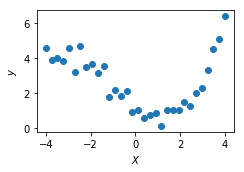

In [3]:
fig, ax = plt.subplots()

ax.scatter(X, y)

ax.set_xlabel('$X$')
ax.set_ylabel('$y$')
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()

Note how the data has a roughly-cubic shape, but the noise obscures it.

### Step 2: Set up the Model
We are going to use a polynomial regression model to fit this data

In [4]:
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=8)),
    ('model', LinearRegression())
])
poly_model

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=8, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

This model is built using the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) tool from scikit-learn. 
Pipeline models that are composed of multiple steps that are performed sequentially when fitting or evaluating the a model.
In our case, these are:
1. [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html): Combine the initial list of features into terms of polynomial
2. [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Fit or evaluate a linear regression model

*ProTip*: Use Pipeline models to avoid having to keep track of multiple steps. Pipeline models behave as normal scikit-learn ML models, so you can use them as you would use any other model.

#### Quick Tutorial: Setting model parameters
The `set_params` function of a scikit-learn model defines the parameters of the model. 
For Pipelines, the names of the settings are `[step name]__[param name]`.

In [5]:
poly_model.set_params(poly__degree=7)  # You can set the variables with `set_params`

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

#### Quick Tutorial: `Fit` and `Predict` using Scikit-Learn
The first thing you will need to know is how to train and evaluate a model

The `fit` method a scikit-learn model trains the model using provided training data

In [6]:
poly_model.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

The predict operation evaluates the trained model using the learned model

In [7]:
X_plot = np.linspace(-4, 4, 256)[:, None]  # Points to use for plotting

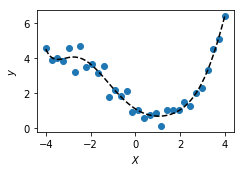

In [8]:
fig, ax = plt.subplots()

# Make the predicions with the model
y_pred = poly_model.predict(X_plot)

ax.scatter(X, y)
ax.plot(X_plot, y_pred, 'k--')

ax.set_xlabel('$X$')
ax.set_ylabel('$y$')
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()

Note that the model seems to fit the data well!

### <font color='red'>Step 3: Perform Cross-Validation</font>
Now, it is your turn to perform cross valiadtion of the model using cross-validation

#### Quick Tutorial: Cross-validation in Scikit-Learn
Scikit-Learn has [many tools for simplifying performing cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). Here, we are going to teach you how to use the [`cross_validate` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), which performs CV in one line of code.

The function takes your model, training data, and a few settings about how to you want to perform the test (e.g., cross-validation scheme, scoring metrics)

In [9]:
cv_results = cross_validate(poly_model, X, y, cv=4, scoring='neg_mean_absolute_error')

... and returns a dictionary of the performance scores and fit times. Note that the values for mean absolute error are negative, as this follows a convention that "the maximum score corrresponds to maximum performance"

In [10]:
cv_results

C:\Users\Logan\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00099921, 0.        , 0.00099969, 0.        ]),
 'score_time': array([0.00099921, 0.00099945, 0.        , 0.00099921]),
 'test_score': array([-28.28578517,  -0.42247843,  -0.26067522, -31.83066181]),
 'train_score': array([-0.22702978, -0.24236373, -0.28141567, -0.28452642])}

### <font color='red'> Task 1: Run cross-validation</font>
Run 8-fold cross validation on a polynomial model of degree 5 and return the correlation coefficient

**HINT**: See the links to the scikit-learn documentation in the previous step

In [13]:
assert isclose(cv_results['test_score'].mean(), -2.915306, abs_tol=1e-6)

### <font color='red'> Task 2: Show performance is better with 3 degrees than 5 degrees</font>
At least with the correlation coefficient

In [14]:
degree5_score = cv_results['test_score'].mean()

In [16]:
degree3_score = cv_results['test_score'].mean()

In [17]:
assert degree3_score > degree5_score

## Part 2: Hyperparameter Optimization
Now, we show how to tune the performance of a model using hyper parameter optimization

#### Quick Tutorial: GridSearchCV
[GridSearchCV](https://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) is a tool that automates running cross-validation for models with different parameters, and telling you which is the best.

We are going to show you using it for determining the optimal degree for the polynomial in question.

You create the GridSearchCV by defining the model to be optimized and the parameters to be varied. 
There are other optional parameters about the type of cross-validation method, etc.

In [18]:
gs = GridSearchCV(poly_model, param_grid={'poly__degree': range(10)}, cv=8, scoring='neg_mean_absolute_error')

Calling the `fit` method performs the tests for all models defined in the grid

In [19]:
gs.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': range(0, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

The results are stored in attributes of the class

In [20]:
gs.best_params_

{'poly__degree': 3}

In [21]:
gs.best_score_

-0.36335574443075025

Note that the model determined the best parameters to be 3. 

You can access the best model as another class attribute

In [22]:
best_model = gs.best_estimator_

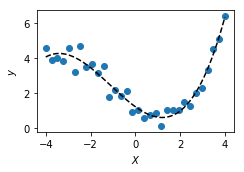

In [23]:
fig, ax = plt.subplots()

# Make the predicions with the model
y_pred = best_model.predict(X_plot)

ax.scatter(X, y)
ax.plot(X_plot, y_pred, 'k--')

ax.set_xlabel('$X$')
ax.set_ylabel('$y$')
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()

Note that this model fits our data very well

### <font color='red'>Task 2: Fit a LASSO model</font>
Your task is to use GridSearchCV to determine the optimal penalty parameter for a LASSO model.
[LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) is a modelling technique where you apply a penalty to a linear regression model equal to a constant times the sum of the absolute values of the coefficients, which is called $L_1$ Regularization.
Larger values of the constant value (called `alpha` in scikit-learn) lead to poorer fitting of the training set at the potential benefit of less overfitting.

In [24]:
lasso_model = Pipeline([
    ('poly', PolynomialFeatures(degree=30)), ## Do not adjust the degree this time!
    ('lasso', Lasso(normalize=True))  # normalize=True removes the mean from the data before fitting, gives better results
])

**HINT**: Use `np.logspace` to generate alphas across many orders of magnitude

*Pro Tip*: Hyperparameter optimization tends to produce warnings. Use Python's [warning module](https://docs.python.org/3/library/warnings.html) to keep your notebooks legible

In [27]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=ConvergenceWarning)
    gs.fit(X, y)

In [28]:
assert gs.best_score_ > -0.7

Plot the results

In [29]:
best_model = gs.best_estimator_

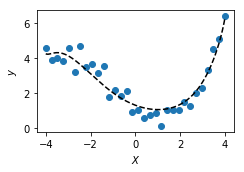

In [30]:
fig, ax = plt.subplots()

# Make the predicions with the model
y_pred = best_model.predict(X_plot)

ax.scatter(X, y)
ax.plot(X_plot, y_pred, 'k--')

ax.set_xlabel('$X$')
ax.set_ylabel('$y$')
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()

*Finding*: Not quite as pretty as limiting complexity, but the score is still reasonable.